# Topic Modelling
---

Loading dataset...
Loaded 2225 documents in 0.379 seconds.
Extracting tf-idf features for NMF...
done in 0.825 seconds.
Extracting tf features for LDA...
done in 0.885 seconds.
Fitting the NMF model (Frobenius norm)...


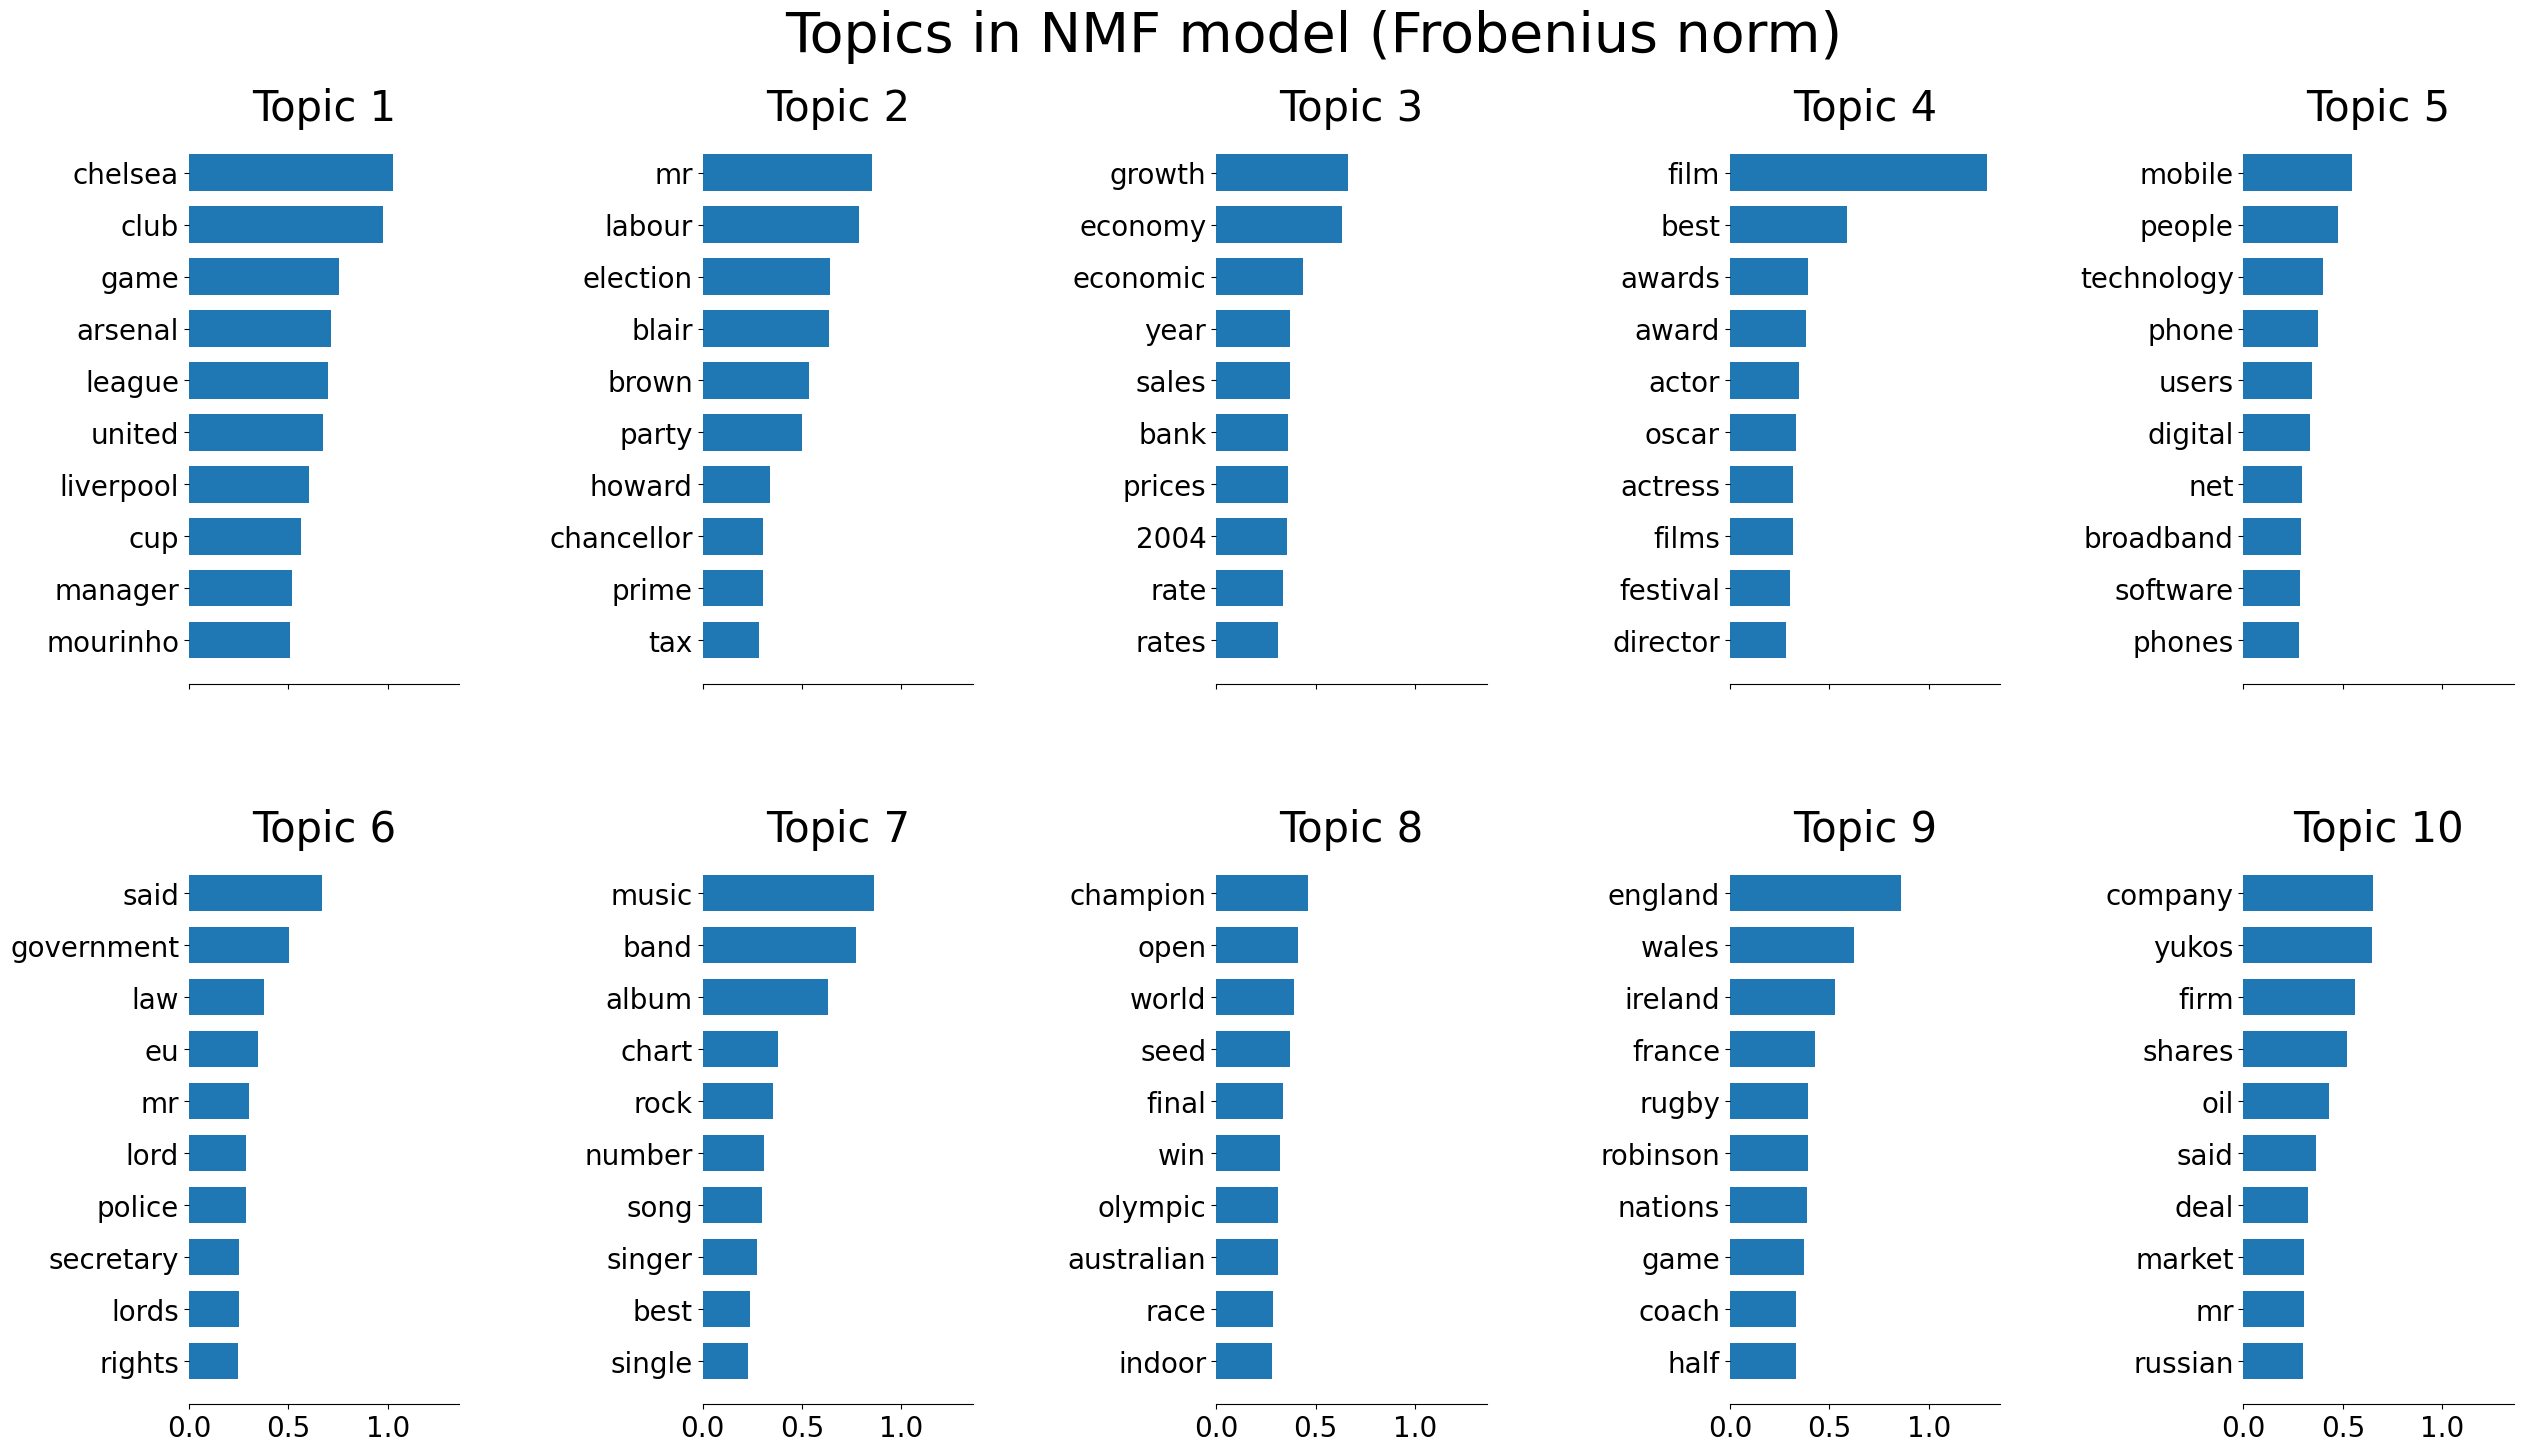

Fitting LDA model...
done in 4.996 seconds.


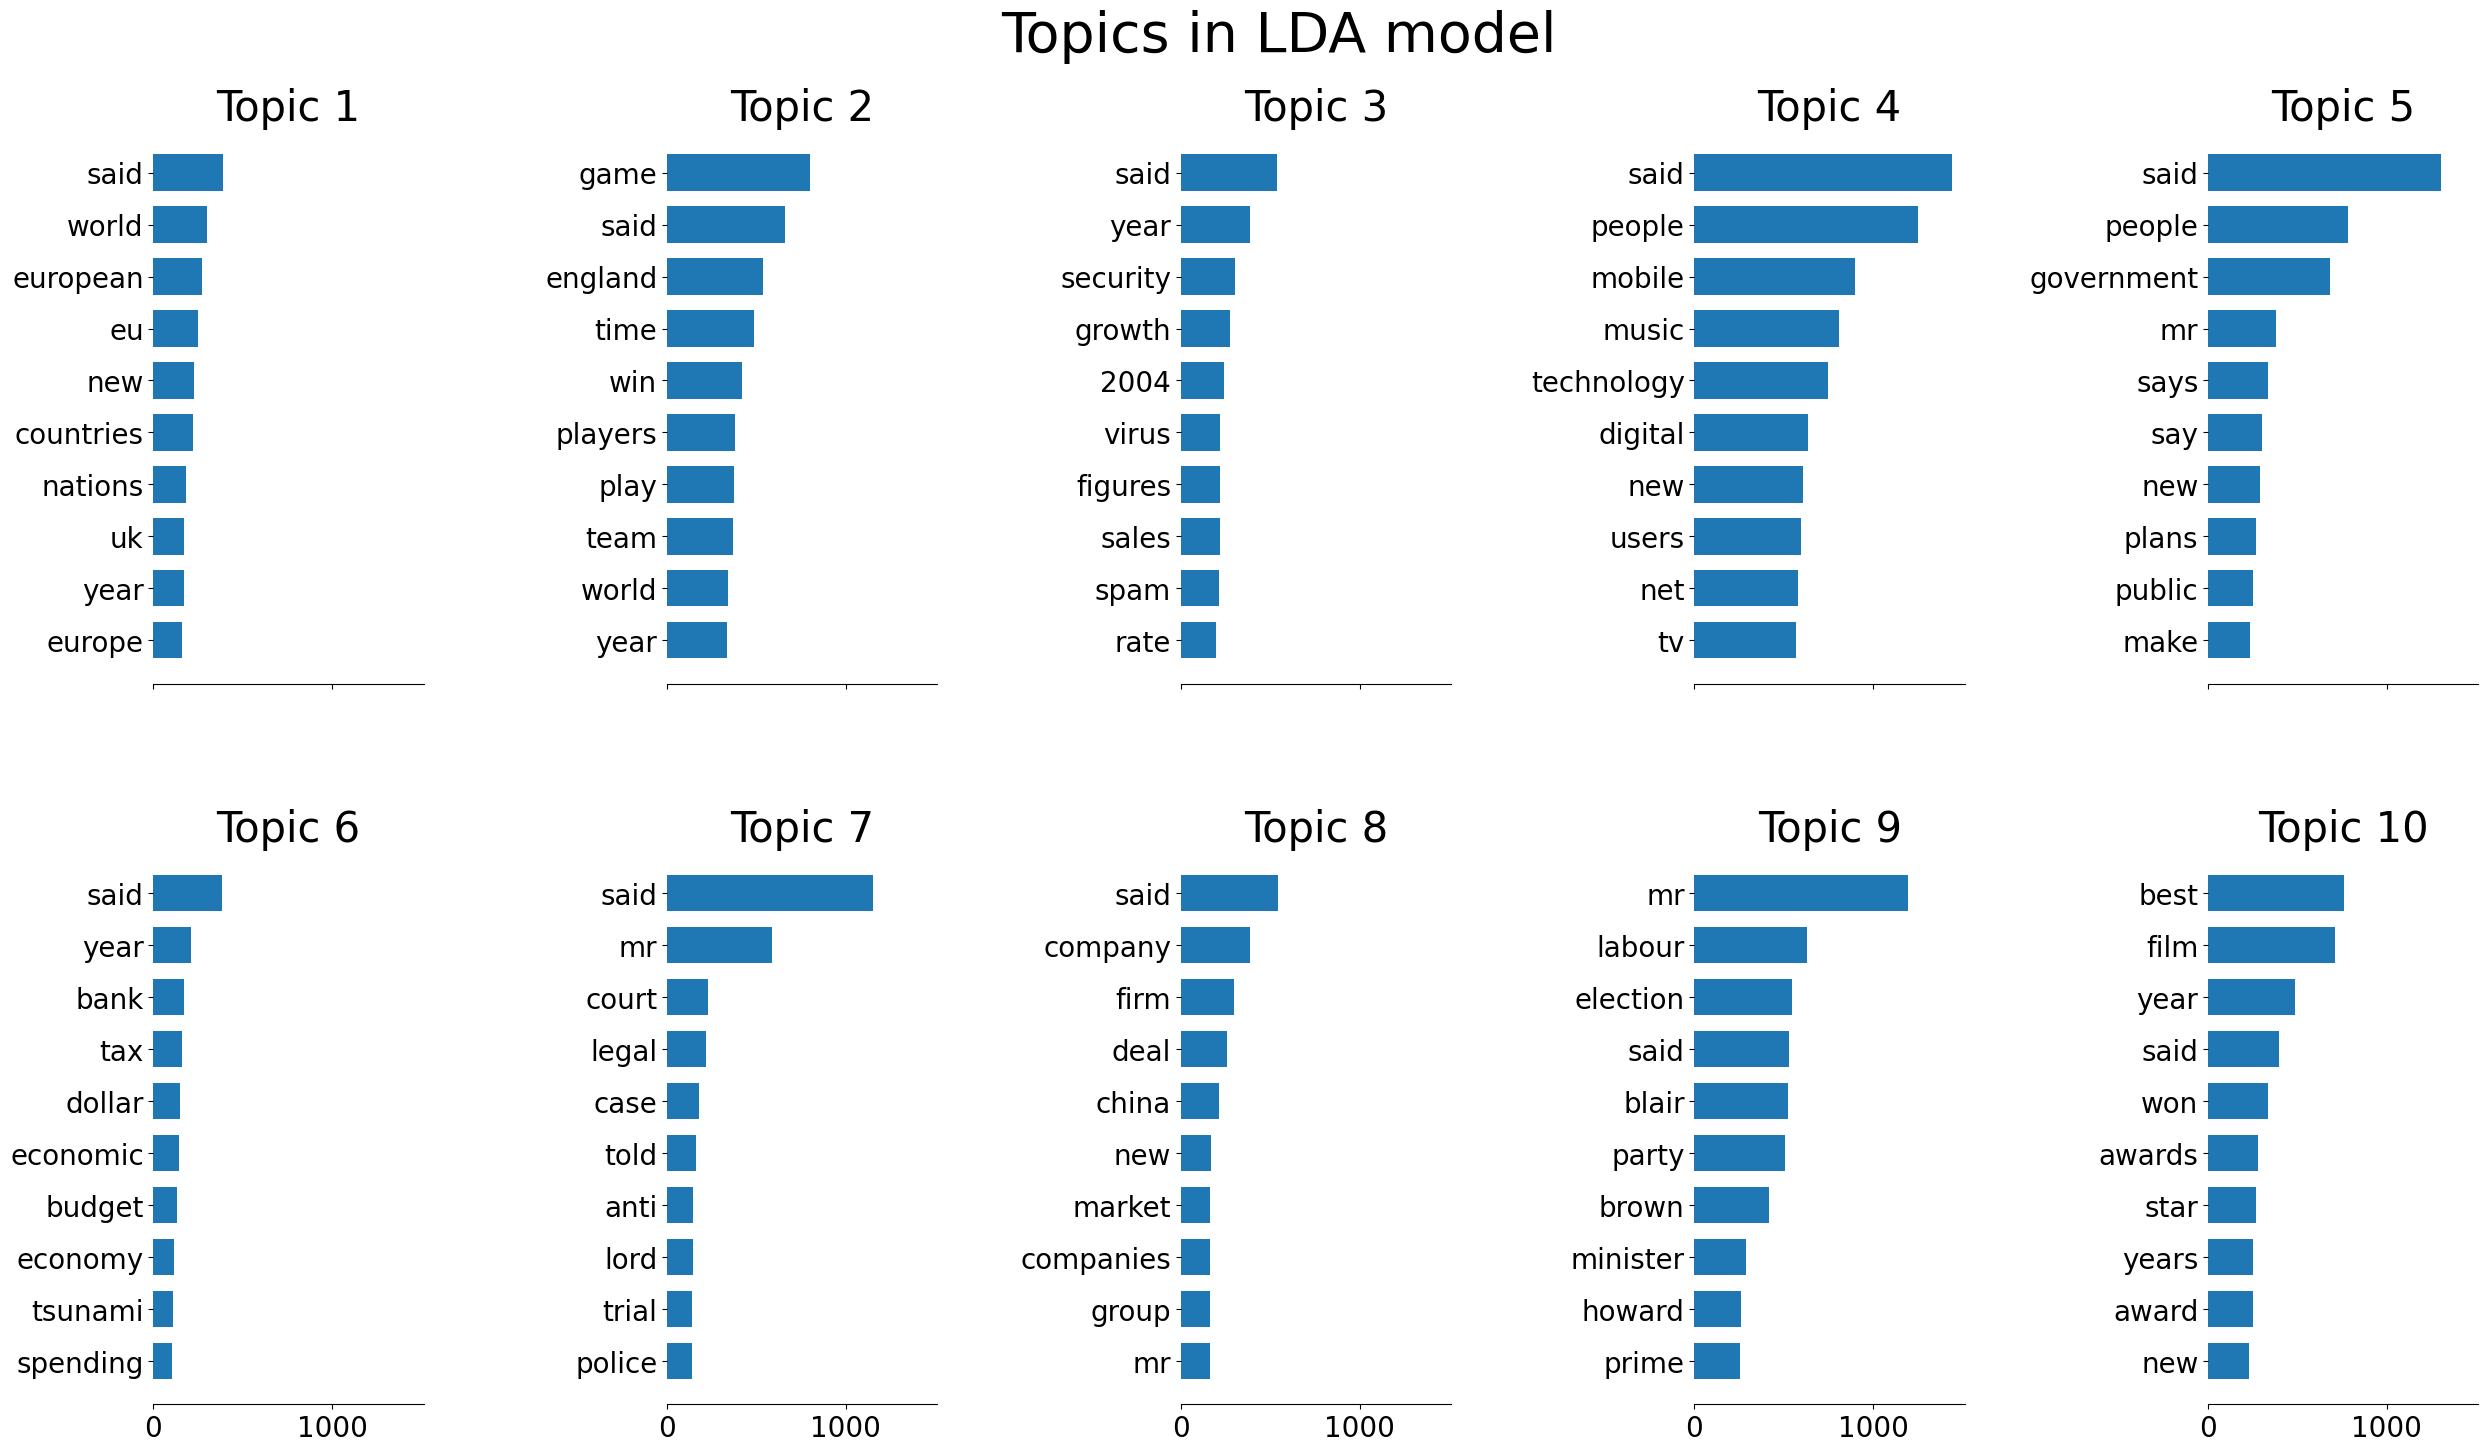

In [ ]:
import os
from time import time
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Directory containing text files
text_dir = r"C:\master\aai_data\text-analysis"  # ".\data"

# Read all .txt files from the directory
def load_texts_from_directory(directory):
    texts = []
    for root, dirs, files in os.walk(directory):
        if not files:
            continue
        for filename in files:
            if filename.endswith(".txt"):
                with open(os.path.join(root, filename), "r") as file:
                    texts.append(file.read())
    return texts

print("Loading dataset...")
t0 = time()
data_samples = load_texts_from_directory(text_dir)
print(f"Loaded {len(data_samples)} documents in {time() - t0:.3f} seconds.")

# Parameters
n_features = 2000
n_components = 10
n_top_words = 10
batch_size = 128
init = "nndsvda"

# Feature extraction
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words="english")
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print(f"done in {time() - t0:.3f} seconds.")

print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words="english")
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print(f"done in {time() - t0:.3f} seconds.")

# Function to plot top words
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Fit NMF models
print("Fitting the NMF model (Frobenius norm)...")
nmf = NMF(n_components=n_components, random_state=1, init=init, beta_loss="frobenius").fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)")

print("Fitting LDA model...")
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method="online", random_state=0)
t0 = time()
lda.fit(tf)
print(f"done in {time() - t0:.3f} seconds.")
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")
